### Lab 1
## Daniel Kroll


In [5]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
import io
d = pd.read_csv(io.BytesIO(uploaded['General Social Survey, 2006.csv']))

Saving General Social Survey, 2006.csv to General Social Survey, 2006 (1).csv


In [6]:
d.head()

,YEAR,ID,WRKSTAT,HRS1,HRS2,EVWORK,WRKSLF,WRKGOVT,OCC80,PREST80,...,SPANENG,WTSS,WTSSNR,WTSSALL,I_AGE,I_ATTEND,I_EDUC,I_GENDER,I_RELIGION,I_REGION
0,2006,1,1,35.0,NaN,NaN,2.0,2.0,95.0,66,...,1,0.43,0.49,0.4297,3.0,6.0,2.0,2,4.0,1
1,2006,2,1,40.0,NaN,NaN,2.0,2.0,243.0,44,...,1,1.91,2.16,1.9096,1.0,1.0,2.0,1,2.0,1
2,2006,3,5,NaN,NaN,1.0,2.0,2.0,715.0,29,...,2,0.86,0.97,0.8593,4.0,1.0,1.0,2,2.0,1
3,2006,4,2,24.0,NaN,NaN,2.0,2.0,313.0,46,...,1,0.43,0.49,0.4297,3.0,1.0,2.0,2,1.0,1
4,2006,5,6,NaN,NaN,2.0,NaN,NaN,NaN,0,...,1,1.29,1.46,1.2890,1.0,1.0,2.0,1,2.0,1


In [ ]:
relig_strength=d.RELITEN.value_counts().sort_index()
levels=['Strong','Not very strong', 'Somewhat strong','No religion', "Don't know", 'No answer']
relig_strength.index=levels
relig_strength.loc['total']=relig_strength.sum()
print(relig_strength)

Strong             1616
Not very strong    1632
Somewhat strong     482
No religion         739
Don't know           12
No answer            29
total              4510
Name: RELITEN, dtype: int64


Let's look at this in percentages:

In [ ]:
relig_strength_pct=relig_strength=d.RELITEN.value_counts(normalize=True).sort_index()*100
levels=['Strong','Not very strong', 'Somewhat strong','No religion', "Don't know", 'No answer']
relig_strength.index=levels
print(relig_strength_pct)

Strong             35.831486
Not very strong    36.186253
Somewhat strong    10.687361
No religion        16.385809
Don't know          0.266075
No answer           0.643016
Name: RELITEN, dtype: float64


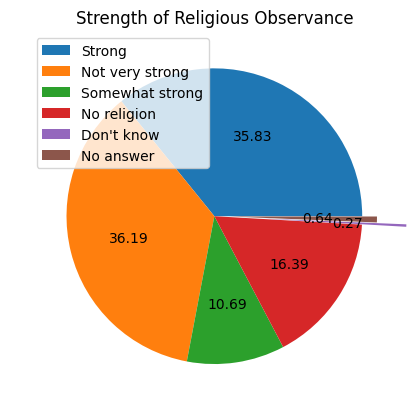

In [ ]:
explode = (0, 0, 0, 0, 0.3,0.1)
relig_strength_pct.plot.pie(explode=explode, ylabel=' ', labels=['','','','','',''], autopct='%.2f', title='Strength of Religious Observance', legend=True)
plt.legend(bbox_to_anchor=(0, 1), loc=2, labels=relig_strength.index)
plt.show()

1-- I chose to examine, from the 2006 GSS Survey, the strength of respondents' stated religion. In the first table, I provided the counts of each response, which ranged from 'Strong' to 'Not very strong', as well as other miscellaneous categories including 'No religion' and 'No answer'. Then, I converted each of these counts into percentages, to analyze whether there are any trends in the data surrounding respondents' strength of religious observance.

From the table of percentages, we see that the categories 'Strong' and 'Not very strong' each have roughly 35% of responses. In other words, over 70% of respondents favored the extremes of religious observance. This is somewhat surprising, since the past 30 years have seen an increase in the secularization of American society. Although that would explain the largest percentage of 'Not very strong', there is still an almost comparable percentage of respondents who indicated having a 'Strong' level of religious observance.

For visualization, I also indicated the percentage distribution in the pie chart above.

In [ ]:
d.RELIG.value_counts().sort_index()

1     2328
2     1114
3       78
4      739
5       39
6       31
7       11
8        2
9       17
10      14
11     102
12       3
13       6
99      26
Name: RELIG, dtype: int64

In [ ]:
relig_count=d.RELIG.value_counts().sort_index()
religions=['Protestant','Catholic','Jewish','None','Other','Buddhism','Hinduism','Other Eastern','Moslem/Islam','Orthodox-Christian','Christian','Native American','Inter-Nondenominational','No answer']
relig_count.index=religions
relig_count.loc['total']=relig_count.sum()
print(relig_count)

Protestant                 2328
Catholic                   1114
Jewish                       78
None                        739
Other                        39
Buddhism                     31
Hinduism                     11
Other Eastern                 2
Moslem/Islam                 17
Orthodox-Christian           14
Christian                   102
Native American               3
Inter-Nondenominational       6
No answer                    26
total                      4510
Name: RELIG, dtype: int64


In [ ]:
inc_avg_byrelig=d.groupby(['RELIG'])['REALRINC'].mean()
religions=['Protestant','Catholic','Jewish','None','Other','Buddhism','Hinduism','Other Eastern','Moslem/Islam','Orthodox-Christian','Christian','Native American','Inter-Nondenominational','No answer']
inc_avg_byrelig.index=religions
print(inc_avg_byrelig)

Protestant                 25212.381199
Catholic                   27183.039474
Jewish                     43464.333333
None                       26883.866109
Other                      31550.000000
Buddhism                   31473.043478
Hinduism                   28597.285714
Other Eastern              62430.500000
Moslem/Islam               18558.700000
Orthodox-Christian         38668.500000
Christian                  22359.607143
Native American            15488.500000
Inter-Nondenominational    16142.500000
No answer                  20146.666667
Name: REALRINC, dtype: float64


In [ ]:
inc_std_byrelig=d.groupby(['RELIG'])['REALRINC'].std()
religions=['Protestant','Catholic','Jewish','None','Other','Buddhism','Hinduism','Other Eastern','Moslem/Islam','Orthodox-Christian','Christian','Native American','Inter-Nondenominational','No answer']
inc_std_byrelig.index=religions
print(inc_std_byrelig)

Protestant                 27364.052514
Catholic                   29843.788572
Jewish                     41468.507767
None                       30195.672179
Other                      37106.727086
Buddhism                   30375.472202
Hinduism                   18702.898828
Other Eastern              71740.932699
Moslem/Islam                9811.165024
Orthodox-Christian         33971.614289
Christian                  22814.505366
Native American             7300.877516
Inter-Nondenominational    10965.816477
No answer                  14378.504424
Name: REALRINC, dtype: float64


<Axes: title={'center': 'REALRINC'}, xlabel='Religion', ylabel='Family Income 1972-1991'>

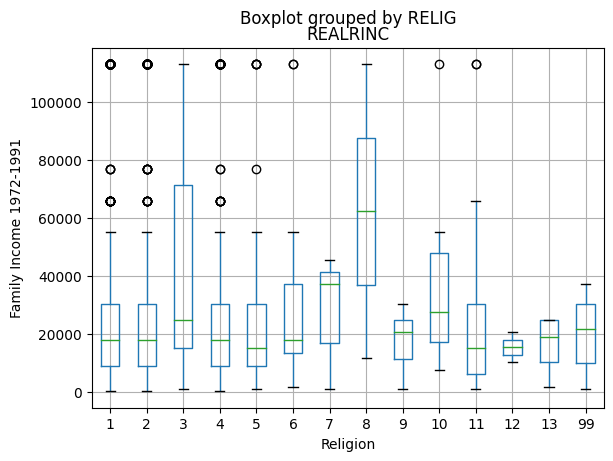

In [ ]:
%matplotlib inline
d.boxplot(column=['REALRINC'], by=['RELIG'], xlabel='Religion', ylabel='Family Income 1972-1991')

Text(0.5, 0, 'Income 1972-1991')

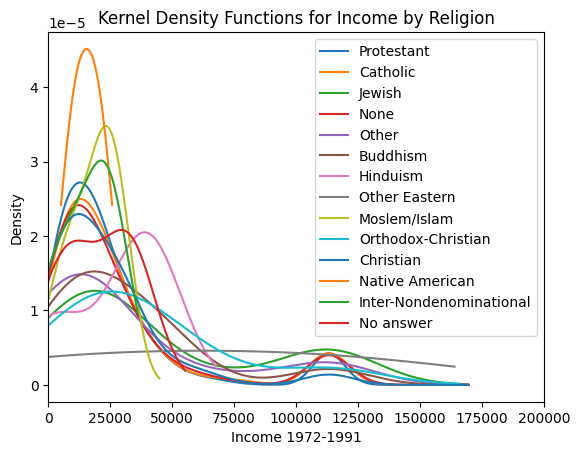

In [14]:
real=d.groupby(['RELIG'])['REALRINC']
religions=['Protestant','Catholic','Jewish','None','Other','Buddhism','Hinduism','Other Eastern','Moslem/Islam','Orthodox-Christian','Christian','Native American','Inter-Nondenominational','No answer']
real.plot.kde(xlim=(0,200000), title='Kernel Density Functions for Income by Religion')
plt.legend(religions)
plt.xlabel('Income 1972-1991')

2-- I chose to analyze respondents' personal income between 1972-1991 adjusted to constant dollars. Specifically, I grouped respondents' personal income by their reported religions, to examine if there is any relationship between being a member of a certain religion and having disproportionaley high or low income. I chose to examine this relationship due to stereotypes surrounding poverty and affluence for specific religious groups, and wanted to see if the GSS 2006 data would refute or bolster these biases.

The numbers 1-13 and 99 correspond to the different possible religious responses to the survery. The mapping of these numbers to their corresponding religions can be found in the 2 counts provided at the beginning of this analysis.


Although we calculated the means and standard deviations, and the means are generally close to the medians, it is difficult to use them as descriptive statistics because the standard deviations are so large, with some of them even being larger than the mean. For example, This would imply that being one standard deviation away from the mean would reflect respondents having negative income, which is not possible.

We will therefore try to examine the data through boxplots, as well as kernel density estimates, to try and see if the incomes, grouped by religion, follow similar distributions or not.


At first glance, it would appear from the data that almost all religions' income distributions have an interquartile range of roughly \$20,000, since the 75th percentiles are all roughly between \$35,000-\$40,000 and the 25th percentiles are all approximately \$15,000-\$20,000. 

The notable exceptions to this distribution, though, are respondents who identified as Jewish or Other Eastern; while the median income for Jewish respondents was similar to other religions, the 75th percentile and the maximum are significantly higher (\$70,000 and >\$100,000 respectively). Similarly, respondents identifying as members of the Other Eastern religions had a median income of roughly \$65,000, with an accordingly higher 75th percentile and maximum.

However, upon closer examination of the data, specifically the counts, it can be argued that the large variation and disproportionate income can be attributed to severely limited sampling. In particular, there are only 2 respondents who identified as Other Eastern, and only 78 who identified as Jewish.

What complicates matters, though, is that Other, Buddhist and Hindu respondents had very low sampling in the construction of their income boxplot as well; yet, their general distribution follows that of the income of religions which had much larger sample sizes.

From the kernel density estimates, we see again that most of the religions overlap with each other, meaning that the estimated distributions of income are roughly the same. Specifically, Jewish respondents seem to be generally in line with many of the other religions, but have a slight increase in probability towards very large incomes, compared to other religions. This can explain the skewed distribution in the boxplot for Jewish respondents. The Other Eastern respondents, however have an almost flat estimated density function, meaning that they are equally probable to have incomes at any point along their distribution. This shows that there is simply not enough data to accurately infer anything about their incomes.Similarly, the Native American respondents have a completely different estimated distribution. Again, this is likely due to a very small sample size, which means we don't have enough data to make any conclusions for them.

Therefore, it is difficult to conclusively make any statements as to the relationship between religious denomination and personal income between 1972-1991, since nearly all of the variation in distributions can be explained by insufficient sampling.

In [7]:
pd.crosstab(d.LIFE,d.TAX)

TAX,1.0,2.0,3.0,8.0,9.0
LIFE,,,,,
1.0,537,413,15,19,0
2.0,524,336,5,22,1
3.0,54,37,3,8,0
8.0,18,6,0,4,0
9.0,1,0,0,0,0


In [13]:
tax_life_pct=pd.crosstab(d.LIFE,d.TAX,normalize='columns')*100
tax_res=['Too high','About right', 'Too low', "Don't know", 'No answer']
tax_life_pct.columns=tax_res
tax_life_pct

,Too high,About right,Too low,Don't know,No answer
LIFE,,,,,
1.0,47.354497,52.146465,65.217391,35.849057,0.0
2.0,46.208113,42.424242,21.739130,41.509434,100.0
3.0,4.761905,4.671717,13.043478,15.094340,0.0
8.0,1.587302,0.757576,0.000000,7.547170,0.0
9.0,0.088183,0.000000,0.000000,0.000000,0.0


<Axes: xlabel='TAX'>

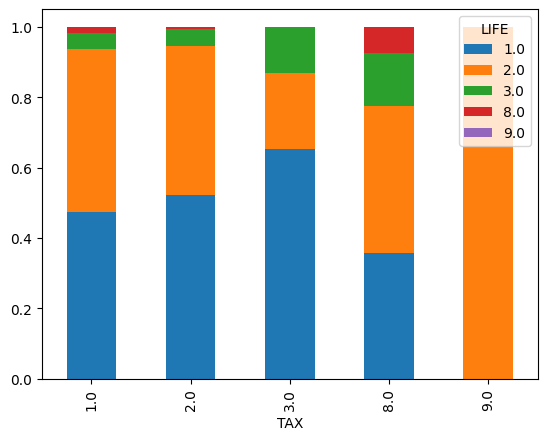

In [11]:
grouped_tax_life = (d.groupby(['TAX', 'LIFE'])['TAX'].count()/d.groupby(['TAX'])['LIFE'].count())
grouped_tax_life.unstack().plot.bar(stacked=True)

3- I chose to examine the relationship between respondents' opinions on how much taxes they pay and how dull or exciting they perceive their lives to be. The main reason I chose this is because I expected that people who feel that they pay too much in taxes would also feel that their lives are less exciting, ie. they may have generally pessimistic views. First, I cross-tabulated the two variables; then, I converted them into percentages and renamed the different opinions on taxes to their proper names. 

Interestingly, I found that people who felt that their taxes were too low responded that their lives were exciting by roughly 15-20% more than those who felt their taxes were too high or just right. 

While this makes sense, I was surprised that the data didn't indicate any seemingly major differences between those who felt their taxes were too high and those who felt they were just right. While people who felt their taxes were just right responded that their lives were exciting at a rate of around 4% more, it is hard to determine whether this 4% represents anything statistically significant or not. Otherwise, though, the distribution of data for these two groups is essentially the same. 

For those who didn't know if they felt their taxes were too high or not, they had the lowest percentage of respondents feeling like life is exciting, at only around 35%. This, too, makes sense, as people who are disinterested about important topics such as their finances could be assumed to have a similarly apathetic attitude towards finding excitement in their lives. On the other hand, one could argue that this is a surprise, as those who are nonchalant about finances often enjoy life to the fullest, without worry or regard for accumulation of wealth.

Overall, the key portions of the data, namely that people who felt they pay very low taxes also felt more excitement in their lives, is consistent with what we expect. However, as stated above, there are a number of groups in the dataset which exhibit behavior which is difficult to interpret.